#Data-Driven Renovation Advice for Homeowners in King County
---


##Introduction

The project focuses on leveraging multiple linear regression modeling and additional statistical techniques to analyze historical sales data in King County, Northwestern County. The goal is to provide data-driven advice to homeowners on how home renovations can increase property values.

##Business Problem

Homeowners often lack accurate information on which renovations yield the best ROI. This project aims to fill that gap by offering strategic guidance based on data analysis, benefiting both homeowners and the real estate agency.

The primary business problem addressed in this project is the **need for actionable insights regarding home renovations and their impact on the estimated value of properties in King County**.

Our stakeholder Best Value real estate agency seeks to specialize in helping homeowners buy and sell homes in King County. Providing data-driven advice by understanding how different renovation features such as kitchen upgrades, bathroom remodels, or energy-efficient installations correlate with changes in home values, the agency can offer strategic guidance to clients.



## Objectives

1. Identify the regression model best suited to analysis of our data.

2. Identify features that have the most influence on property prices.

3. Use these features to undertand their relationship with propoerty prices.

## Methodolody

**Data Preprocessing**: Handle missing values: Determine how to handle missing values in the dataset, whether through imputation or removal of incomplete records.

**Encode categorical variables**: Convert categorical variables such as 'waterfront' and 'view' into numerical representations using techniques like one-hot encoding.

**Feature scaling**: Scale numerical features to a similar range to prevent dominance by features with larger magnitudes.

**Feature Selection**:Select relevant features: Identify features that have a significant impact on property prices based on domain knowledge and statistical analysis.
Drop irrelevant features: Remove features that are not expected to have a strong influence on the target variable.

**Train-Test Split**: Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
Consider using techniques like cross-validation for more robust evaluation.

**Model Selection**: Choose a regression algorithm suited to the problem, such as linear regression, decision tree regression, random forest regression, or gradient boosting regression.
Experiment with different algorithms and hyperparameters to find the model that best fits the data.

**Model Training**: Train the chosen regression model on the training dataset using appropriate training techniques.
Monitor the model's performance during training to detect overfitting or underfitting.

**Model Evaluation**: Evaluate the trained model's performance on the testing dataset using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R2) score.
Compare the model's performance against baseline models and alternative algorithms.

**Interpretation and Analysis**: Interpret the coefficients or feature importances provided by the regression model to understand the relative importance of different features on property prices.
Analyze the model's predictions and residuals to identify patterns, trends, and potential areas for improvement.

**Fine-tuning and Optimization**: Fine-tune the model by adjusting hyperparameters or exploring feature engineering techniques to improve performance.
Consider ensemble methods or advanced regression techniques to further enhance the model's predictive capabilities.

**Deployment and Monitoring**: Deploy the trained regression model in a production environment for real-time predictions or decision support.
Monitor the model's performance over time and retrain as necessary to maintain accuracy and relevance.

## Data Preprocessing
Import Necessary Libraries.

In [234]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [235]:
# Step 1: Data Loading
data = pd.read_csv("kc_house_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [236]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [237]:
# Drop rows with missing values
data.dropna(inplace=True)

# Verify if missing values have been removed
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long       

In [238]:
data_cleaned = data.dropna()
data_cleaned

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


## Encode Categorical Variables

In [239]:
# Show Numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:")
print(numerical_columns)

# Show Categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Categorical columns:
['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']


In [240]:
# Unique values for waterfront
print("Unique values for 'waterfront':")
print(data_cleaned['waterfront'].unique())

# Unique values for view
print("\nUnique values for 'view':")
print(data_cleaned['view'].unique())

# Unique values for grade
print("\nUnique values for 'grade':")
print(data_cleaned['grade'].unique())

# Unique values for condition
print("\nUnique values for 'condition':")
print(data_cleaned['condition'].unique())


Unique values for 'waterfront':
['NO' 'YES']

Unique values for 'view':
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']

Unique values for 'grade':
['7 Average' '8 Good' '11 Excellent' '9 Better' '6 Low Average' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']

Unique values for 'condition':
['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [241]:
# Encode 'waterfront'
waterfront_mapping = {'NO': 0, 'YES': 1}
data_cleaned['waterfront'] = data_cleaned['waterfront'].replace(waterfront_mapping)

# Encode 'view'
view_mapping = {'NONE': 0, 'AVERAGE': 1, 'FAIR': 2, 'GOOD': 3, 'EXCELLENT': 4}
data_cleaned['view'] = data_cleaned['view'].replace(view_mapping)

# Encode 'grade'
grade_mapping = {'7 Average': 7, '8 Good': 8, '11 Excellent': 11, '9 Better': 9,
                 '6 Low Average': 6, '5 Fair': 5, '10 Very Good': 10, '12 Luxury': 12,
                 '4 Low': 4, '3 Poor': 3, '13 Mansion': 13}
data_cleaned['grade'] = data_cleaned['grade'].replace(grade_mapping)

# Encode 'condition'
condition_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Average': 3, 'Very Good': 4}
data_cleaned['condition'] = data_cleaned['condition'].replace(condition_mapping)

In [242]:
# Encode date values
# Convert 'date' to datetime format
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# Extract year, month, and day from 'date'
data_cleaned['year'] = data_cleaned['date'].dt.year
data_cleaned['month'] = data_cleaned['date'].dt.month
data_cleaned['day'] = data_cleaned['date'].dt.day

# Drop the original 'date' column
data_cleaned.drop('date', axis=1, inplace=True)

In [243]:
# Encode sqft_basement
# Replace "?" with NaN
data_cleaned['sqft_basement'] = data_cleaned['sqft_basement'].replace('?', np.nan)

# Convert 'sqft_basement' to numeric
data_cleaned['sqft_basement'] = pd.to_numeric(data_cleaned['sqft_basement'])

# Impute missing values with the median
median_sqft_basement = data_cleaned['sqft_basement'].median()
data_cleaned['sqft_basement'].fillna(median_sqft_basement, inplace=True)


In [244]:
data_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,9
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,4,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2,18
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,...,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,5,12
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,1995,0.0,98003,47.3097,-122.327,2238,6819,2014,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,0,3,...,2008,0.0,98116,47.5773,-122.409,1330,1265,2015,2,19
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5,21
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,2,23
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,6,23


In [245]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15762 entries, 1 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   price          15762 non-null  float64
 2   bedrooms       15762 non-null  int64  
 3   bathrooms      15762 non-null  float64
 4   sqft_living    15762 non-null  int64  
 5   sqft_lot       15762 non-null  int64  
 6   floors         15762 non-null  float64
 7   waterfront     15762 non-null  int64  
 8   view           15762 non-null  int64  
 9   condition      15762 non-null  int64  
 10  grade          15762 non-null  int64  
 11  sqft_above     15762 non-null  int64  
 12  sqft_basement  15762 non-null  float64
 13  yr_built       15762 non-null  int64  
 14  yr_renovated   15762 non-null  float64
 15  zipcode        15762 non-null  int64  
 16  lat            15762 non-null  float64
 17  long           15762 non-null  float64
 18  sqft_living

## Feature Scaling

### **Standardization**:

* Maintains the relative differences in the values of your features.
* Less affected by outliers compared to Min-Max Scaling.
* Suitable for algorithms that assume your features are normally distributed, such as linear regression or logistic regression.
* Results in transformed features with a mean of 0 and a standard deviation of 1, which can be useful for some algorithms that rely on this assumption.

In [246]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

In [247]:
# Assuming scaled_data is your NumPy array
scaled_data_df = pd.DataFrame(scaled_data)

# Now, you can call the info() method
scaled_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15762 non-null  float64
 1   1       15762 non-null  float64
 2   2       15762 non-null  float64
 3   3       15762 non-null  float64
 4   4       15762 non-null  float64
 5   5       15762 non-null  float64
 6   6       15762 non-null  float64
 7   7       15762 non-null  float64
 8   8       15762 non-null  float64
 9   9       15762 non-null  float64
 10  10      15762 non-null  float64
 11  11      15762 non-null  float64
 12  12      15762 non-null  float64
 13  13      15762 non-null  float64
 14  14      15762 non-null  float64
 15  15      15762 non-null  float64
 16  16      15762 non-null  float64
 17  17      15762 non-null  float64
 18  18      15762 non-null  float64
 19  19      15762 non-null  float64
 20  20      15762 non-null  float64
 21  21      15762 non-null  float64
 22

## Feature Selection

In [248]:
#Let us load our column info to know which features to use:
# Load column_names.md file to understand column names and descriptions
with open('column_names.md', 'r') as file:
    column_names_data = file.readlines()

# Display the content of column_names.md
for line in column_names_data:
    print(line)

# Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house

* `date` - Date house was sold

* `price` - Sale price (prediction target)

* `bedrooms` - Number of bedrooms

* `bathrooms` - Number of bathrooms

* `sqft_living` - Square footage of living space in the home

* `sqft_lot` - Square footage of the lot

* `floors` - Number of floors (levels) in house

* `waterfront` - Whether the house is on a waterfront

  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts

* `view` - Quality of view from house

  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other

* `condition` - How good the overall condition of the house is. Related to maintenance of house.

  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glos

In [249]:
# Feature Selection to build our model
# Keep only numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['number']).columns.tolist()
data_cleaned = data_cleaned[numerical_columns]

data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15762 entries, 1 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   price          15762 non-null  float64
 2   bedrooms       15762 non-null  int64  
 3   bathrooms      15762 non-null  float64
 4   sqft_living    15762 non-null  int64  
 5   sqft_lot       15762 non-null  int64  
 6   floors         15762 non-null  float64
 7   waterfront     15762 non-null  int64  
 8   view           15762 non-null  int64  
 9   condition      15762 non-null  int64  
 10  grade          15762 non-null  int64  
 11  sqft_above     15762 non-null  int64  
 12  sqft_basement  15762 non-null  float64
 13  yr_built       15762 non-null  int64  
 14  yr_renovated   15762 non-null  float64
 15  zipcode        15762 non-null  int64  
 16  lat            15762 non-null  float64
 17  long           15762 non-null  float64
 18  sqft_living

## Train-test Split

In [250]:
# Define features (X) and target variable (y)
X = data_cleaned.drop('price', axis=1)  # Features
y = data_cleaned['price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12609, 22)
X_test shape: (3153, 22)
y_train shape: (12609,)
y_test shape: (3153,)


## Model Selection

In [251]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Networks": MLPRegressor(random_state=42),
    "Support Vector Machines": SVR(),
    "ElasticNet Regression": ElasticNet(random_state=42)
}

# Dictionary to store evaluation metrics
evaluation_metrics = {}

# Loop through each model
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store evaluation metrics
    evaluation_metrics[model_name] = {"MAE": mae, "MSE": mse, "R^2": r2}

# Print evaluation metrics for each model
for model_name, metrics in evaluation_metrics.items():
    print(f"{model_name} Metrics:")
    print("Mean Absolute Error (MAE):", metrics["MAE"])
    print("Mean Squared Error (MSE):", metrics["MSE"])
    print("R^2 Score:", metrics["R^2"])
    print()

Linear Regression Metrics:
Mean Absolute Error (MAE): 127852.28449185674
Mean Squared Error (MSE): 36303903304.50856
R^2 Score: 0.7018938815877389

Random Forest Metrics:
Mean Absolute Error (MAE): 71219.4659657469
Mean Squared Error (MSE): 15391491297.292429
R^2 Score: 0.8736142037200136

Gradient Boosting Metrics:
Mean Absolute Error (MAE): 77212.25742901956
Mean Squared Error (MSE): 15955964402.205326
R^2 Score: 0.8689790854286755

Neural Networks Metrics:
Mean Absolute Error (MAE): 412039.6700322506
Mean Squared Error (MSE): 286101600395.6806
R^2 Score: -1.3492966265944242

Support Vector Machines Metrics:
Mean Absolute Error (MAE): 215987.6067220626
Mean Squared Error (MSE): 129944310926.70798
R^2 Score: -0.06702559818977138

ElasticNet Regression Metrics:
Mean Absolute Error (MAE): 148825.30869021305
Mean Squared Error (MSE): 47643502784.73508
R^2 Score: 0.6087798173218117



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.581e+14, tolerance: 1.800e+11
  model = cd_fast.enet_coordinate_descent(


## Model Evaluation

In [252]:
# Initialize variables to track the best model and its performance
best_model = None
best_metric_value = -float('inf')  # Initialize with negative infinity for R^2 score
best_metric_name = "R^2 Score"

# Iterate over the evaluation metrics dictionary
for model_name, metrics in evaluation_metrics.items():
    # Consider R^2 score as the performance metric for selecting the best model
    r2 = metrics["R^2"]

    # Update the best model if the current model performs better
    if r2 > best_metric_value:
        best_model = model_name
        best_metric_value = r2

# Print the best model and its performance
print("Best Model:")
print("Model:", best_model)
print("Metric:", best_metric_name)
print("Value:", best_metric_value)


Best Model:
Model: Random Forest
Metric: R^2 Score
Value: 0.8736142037200136


### Assumptions of our model

In [253]:
# Assuming Random Forest was determined as the best model
# Instantiate and train the Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Make assumptions about the model
print("\nAssumptions about the Random Forest model:")
print("1. Non-linearity: Random Forest captures non-linear relationships between features and target.")
print("2. Feature Importance: Features deemed important by the model are relevant predictors.")
print("3. No multicollinearity: Random Forest is less sensitive to multicollinearity.")
print("4. No spatial autocorrelation: Errors are assumed to be independent of location.")
print("5. Homoscedasticity: Constant variance of errors across all levels of predictors.")
print("6. No outliers: Model assumes no significant outliers that could unduly influence predictions.")
print("7. No overfitting: Model generalizes well to unseen data without overfitting.")

# Additional analysis and validation may be necessary to confirm assumptions

Mean Absolute Error (MAE): 70694.81845543926
Mean Squared Error (MSE): 15269783866.763474
R^2 Score: 0.8746135929425056

Assumptions about the Random Forest model:
1. Non-linearity: Random Forest captures non-linear relationships between features and target.
2. Feature Importance: Features deemed important by the model are relevant predictors.
3. No multicollinearity: Random Forest is less sensitive to multicollinearity.
4. No spatial autocorrelation: Errors are assumed to be independent of location.
5. Homoscedasticity: Constant variance of errors across all levels of predictors.
6. No outliers: Model assumes no significant outliers that could unduly influence predictions.
7. No overfitting: Model generalizes well to unseen data without overfitting.


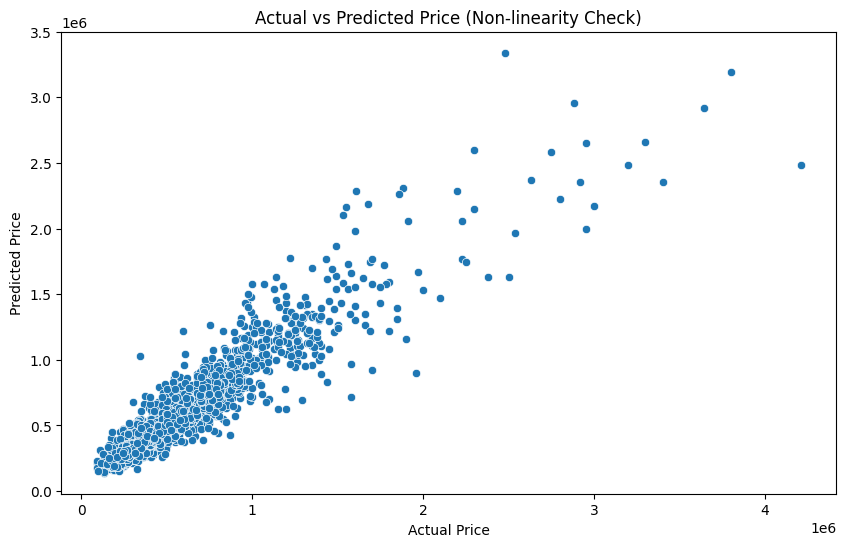

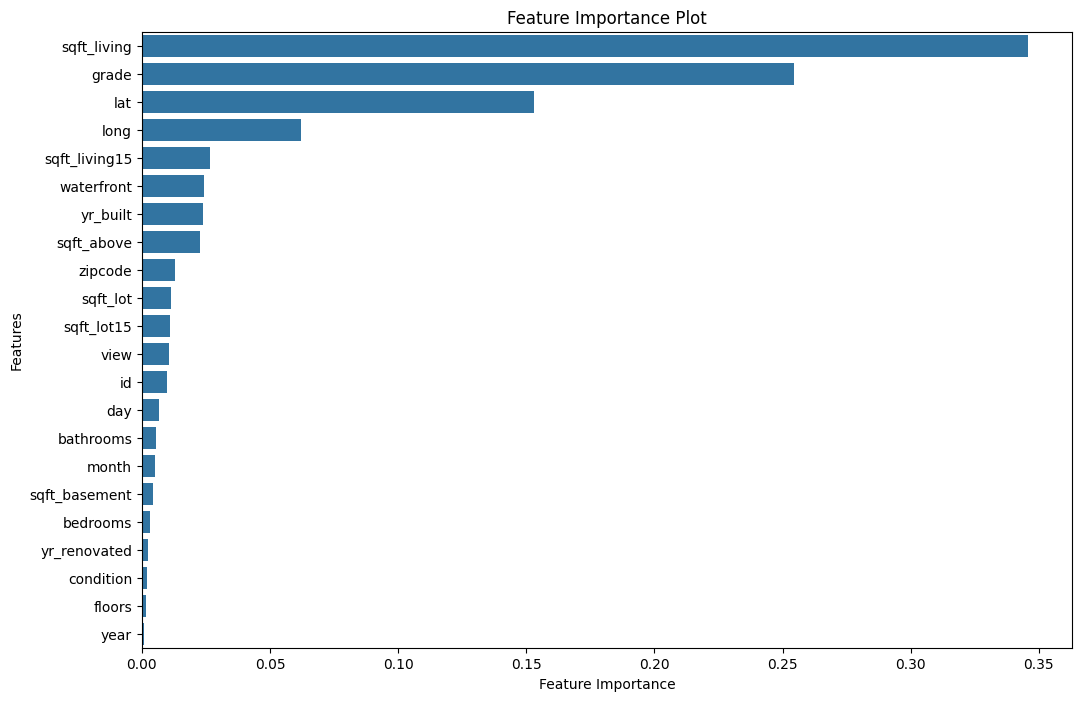

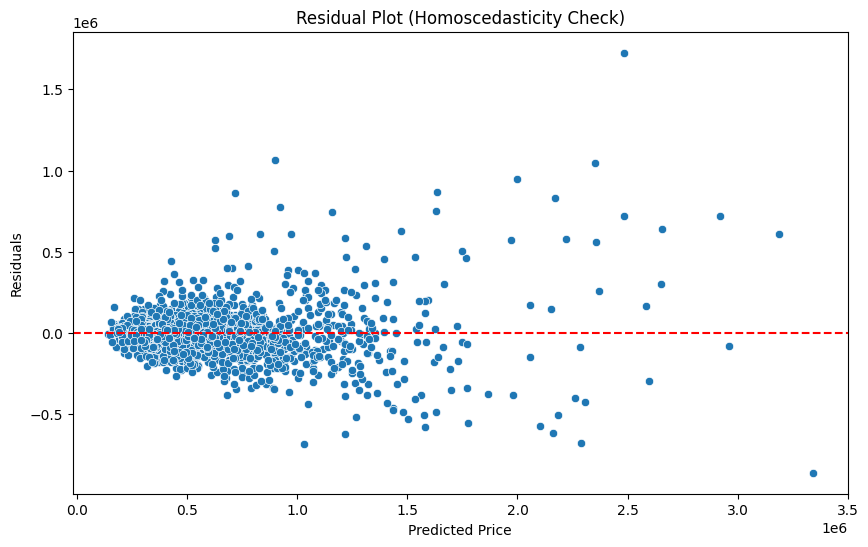

In [254]:
# 1. Non-linearity: Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Non-linearity Check)")
plt.show()

# 2. Feature Importance: Plot of feature importances
feature_importances = random_forest_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[sorted_indices], y=sorted_features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

# 3. Homoscedasticity: Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Homoscedasticity Check)")
plt.show()

In [255]:
#Multicollinearity
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif)


         Features         VIF
0              id    3.653740
1        bedrooms    1.638056
2       bathrooms    3.335337
3     sqft_living  148.615900
4        sqft_lot    2.106954
5          floors    2.014105
6      waterfront    1.247176
7            view    1.461909
8       condition    1.048786
9           grade    3.448411
10     sqft_above  120.219242
11  sqft_basement   33.487033
12       yr_built    2.137053
13   yr_renovated    1.111860
14        zipcode    1.549240
15            lat    1.175096
16           long    1.834110
17  sqft_living15    2.988041
18     sqft_lot15    2.141163
19           year    0.223486
20          month    1.137043
21            day    1.005321


## Interpretation and analysis

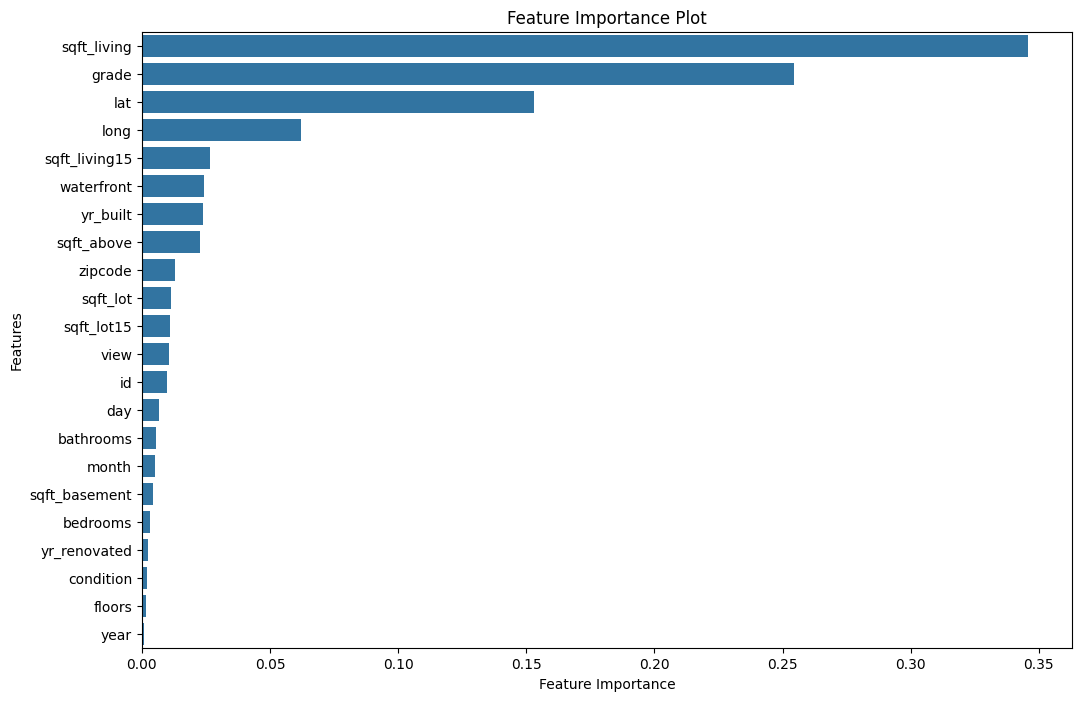

In [256]:
# Feature Importance
feature_importances = random_forest_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[sorted_indices], y=sorted_features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

In [257]:
# Feature Importance
feature_importances = random_forest_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]

# Print the feature performance metrics
print("Feature Performance Metrics:")
for i, feature_index in enumerate(sorted_indices):
    feature_name = X.columns[feature_index]
    importance = feature_importances[feature_index]
    print(f"{i+1}. {feature_name}: {importance}")

Feature Performance Metrics:
1. sqft_living: 0.3455925585612055
2. grade: 0.2545534615935305
3. lat: 0.15309820584311654
4. long: 0.06211983836569024
5. sqft_living15: 0.02659155593288341
6. waterfront: 0.024371923783229422
7. yr_built: 0.02368851809827049
8. sqft_above: 0.022562127042785783
9. zipcode: 0.013021032810793347
10. sqft_lot: 0.011204855795894841
11. sqft_lot15: 0.011018331198282582
12. view: 0.010383388550464062
13. id: 0.009686678195223177
14. day: 0.006831886758322813
15. bathrooms: 0.005357065295080002
16. month: 0.0049528489964006635
17. sqft_basement: 0.004376043071340683
18. bedrooms: 0.0032621083925341537
19. yr_renovated: 0.0025182044770877105
20. condition: 0.002051179754125821
21. floors: 0.0017841073013141915
22. year: 0.0009740801824240482


From our relative importance of various features in predicting price. The feature with the highest importance is "sqft_living", which has a value of 0.345. Other highly important features include "grade", "lat", and "long". The plot provides a visual representation of which features contribute the most to the model's predictions.

### Square foot of Living space.

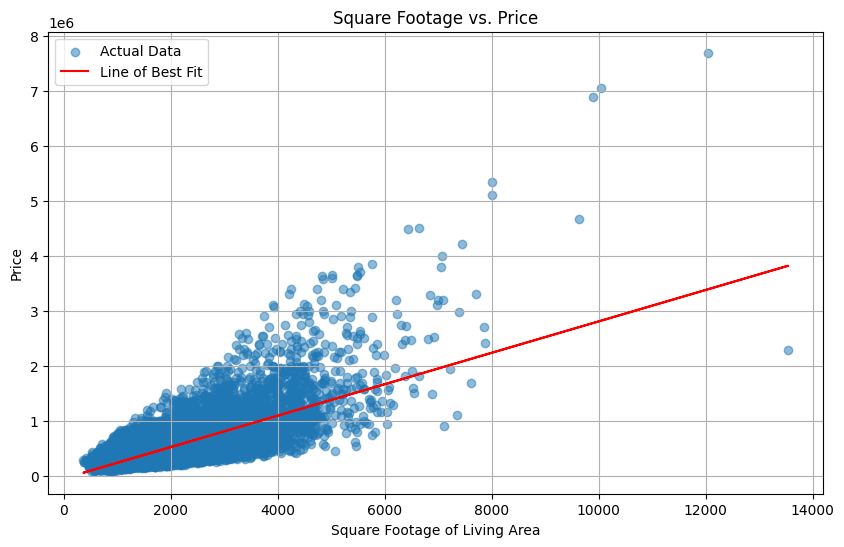

In [273]:
# Extract the features and target variable
X = data_cleaned['sqft_living'].values.reshape(-1, 1)  # Reshape X to a 2D array for sklearn
y = data_cleaned['price'].values

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot the scatter plot and line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Line of Best Fit')
plt.title('Square Footage vs. Price')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [259]:
# Calculate summary statistics for 'sqft_living' and 'price' variables
summary_stats = data_cleaned[['sqft_living', 'price']].describe()

# Print summary statistics
print(summary_stats)

        sqft_living         price
count  15762.000000  1.576200e+04
mean    2084.512372  5.413172e+05
std      918.617686  3.722258e+05
min      370.000000  8.200000e+04
25%     1430.000000  3.210000e+05
50%     1920.000000  4.500000e+05
75%     2550.000000  6.448750e+05
max    13540.000000  7.700000e+06


1. Square Footage of Living Area (sqft_living):

* The dataset contains 15,762 observations of square footage of living area.
* The average square footage of living area is approximately 2,084 square feet, with a standard deviation of approximately 919 square feet.
* The minimum living area size is 370 square feet, while the maximum living area size is 13,540 square feet.
* The median (50th percentile) living area size is 1,920 square feet.
* The interquartile range (IQR), represented by the difference between the 75th percentile (Q3) and the 25th percentile (Q1), is 1,120 square feet. This indicates that the middle 50% of the data falls within this range.

2. Price:

* The dataset also contains 15,762 observations of property prices.
* The average price of properties is approximately $541,317, with a standard deviation of approximately $372,226.
* The minimum price is $82,000, while the maximum price is $7,700,000. .
The median (50th percentile) price is $450,000.

* The interquartile range (IQR) for prices is approximately $323,000, indicating the middle 50% of the data falls within this range.

These interpretations provide insights into the distribution and variability of square footage and property prices in the dataset, which can inform further analysis and decision-making processes related to real estate.

### Latitude and Longitude

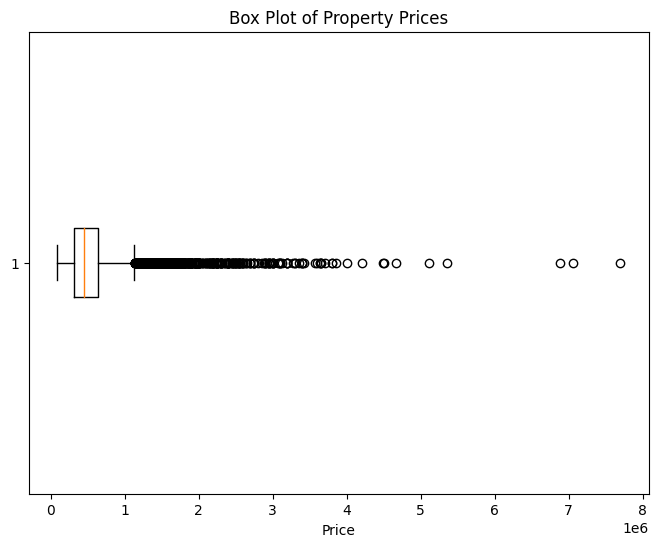

In [260]:
import matplotlib.pyplot as plt

# Create a box plot for the 'price' variable
plt.figure(figsize=(8, 6))
plt.boxplot(data_cleaned['price'], vert=False)
plt.title('Box Plot of Property Prices')
plt.xlabel('Price')
plt.show()


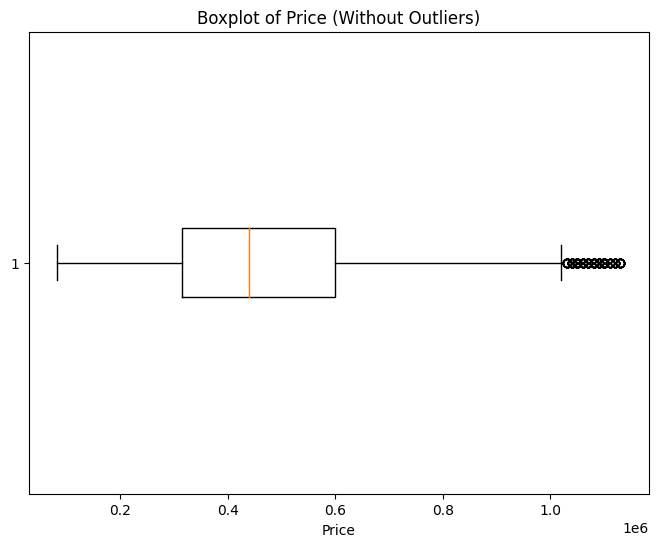

In [261]:
# Calculate the IQR for 'price'
Q1 = data_cleaned['price'].quantile(0.25)
Q3 = data_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from 'price' column
data_cleaned_no_outliers = data_cleaned[(data_cleaned['price'] >= lower_bound) & (data_cleaned['price'] <= upper_bound)]

# Visualize the boxplot after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data_cleaned_no_outliers['price'], vert=False)
plt.title('Boxplot of Price (Without Outliers)')
plt.xlabel('Price')
plt.show()


In [264]:
import plotly.express as px

# Plot the map using Plotly
fig = px.scatter_mapbox(data_cleaned_no_outliers, lat="lat", lon="long", color="price",
                        color_continuous_scale=px.colors.sequential.Viridis,
                        zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Property Prices by Latitude and Longitude')
fig.show()

### Grade of Property

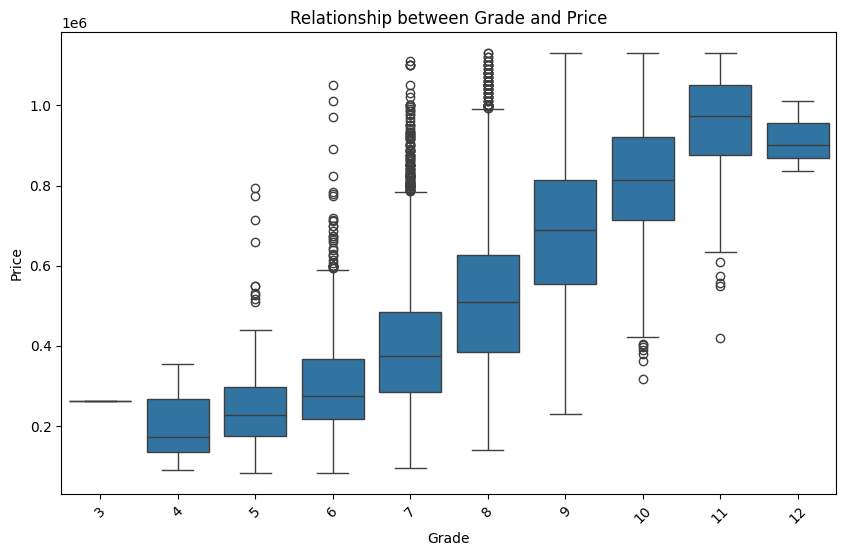

In [275]:
# Create a box plot to visualize the relationship between grade and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=data_cleaned_no_outliers)
plt.title('Relationship between Grade and Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

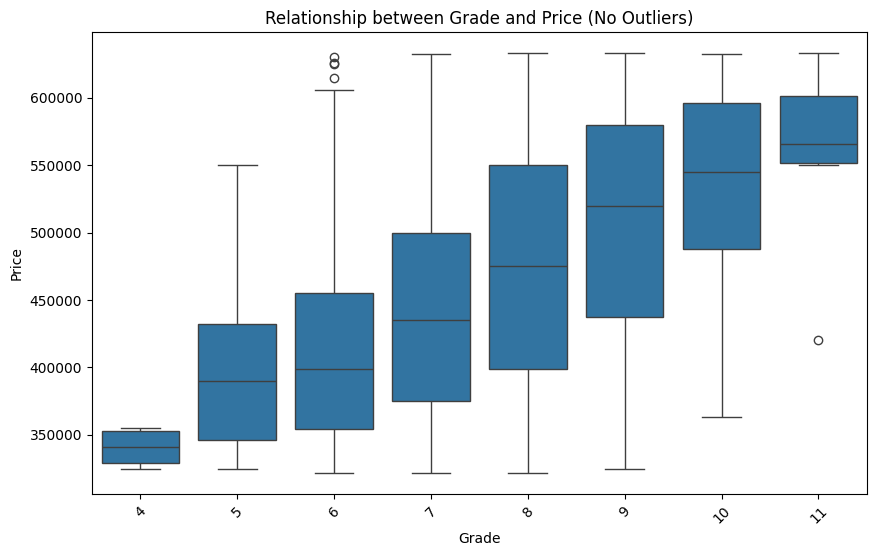

In [270]:
from scipy import stats

# Calculate the Z-scores for the 'price' column
z_scores = stats.zscore(data_cleaned_no_outliers['price'])

# Define a threshold for the Z-score to identify outliers
threshold = 0.75

# Remove outliers based on the Z-score
data_no_outliers = data_cleaned_no_outliers[(z_scores < threshold) & (z_scores > -threshold)]

# Create a box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=data_no_outliers)
plt.title('Relationship between Grade and Price (No Outliers)')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [276]:
# Calculate median, 25th and 75th percentiles for each grade
grade_price_stats = data_cleaned_no_outliers.groupby('grade')['price'].describe(percentiles=[.25, .75])

# Calculate IQR for each grade
grade_price_stats['IQR'] = grade_price_stats['75%'] - grade_price_stats['25%']

# Extract outliers for each grade
outliers = {}
for grade, group in data_cleaned_no_outliers.groupby('grade'):
    q1 = grade_price_stats.loc[grade, '25%']
    q3 = grade_price_stats.loc[grade, '75%']
    iqr = grade_price_stats.loc[grade, 'IQR']
    outliers[grade] = group[(group['price'] < q1 - 1.5 * iqr) | (group['price'] > q3 + 1.5 * iqr)]

# Print median, IQR, and outliers for each grade
for grade in outliers:
    print(f"Grade {grade}:")
    print(f"Median: {grade_price_stats.loc[grade, '50%']}")
    print(f"IQR: {grade_price_stats.loc[grade, 'IQR']}")
    print(f"Number of Outliers: {len(outliers[grade])}")
    print()

Grade 3:
Median: 262000.0
IQR: 0.0
Number of Outliers: 0

Grade 4:
Median: 172000.0
IQR: 131500.0
Number of Outliers: 0

Grade 5:
Median: 227450.0
IQR: 121750.0
Number of Outliers: 10

Grade 6:
Median: 276000.0
IQR: 151000.0
Number of Outliers: 35

Grade 7:
Median: 375000.0
IQR: 200000.0
Number of Outliers: 121

Grade 8:
Median: 509500.0
IQR: 242750.0
Number of Outliers: 65

Grade 9:
Median: 690000.0
IQR: 258421.0
Number of Outliers: 0

Grade 10:
Median: 813000.0
IQR: 205000.0
Number of Outliers: 7

Grade 11:
Median: 972800.0
IQR: 175000.0
Number of Outliers: 5

Grade 12:
Median: 900000.0
IQR: 87500.0
Number of Outliers: 0



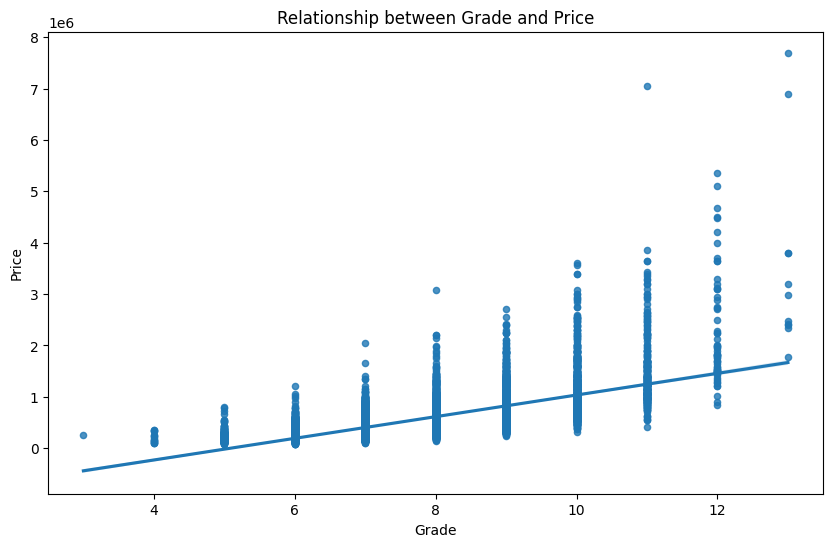

In [272]:
# Create a scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x='grade', y='price', data=data_cleaned, scatter_kws={'s': 20})
plt.title('Relationship between Grade and Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()


### Correlation analysis

Correlation of our influential features against price.

In [274]:
# Calculate correlation matrix
correlation_matrix = data_cleaned[['grade', 'lat', 'long', 'sqft_lot', 'price']].corr()

# Extract correlation coefficients for price
price_correlation = correlation_matrix['price']

# Print correlation coefficients
print("Correlation with Price:")
print(price_correlation)


Correlation Matrix:
             grade       lat      long  sqft_lot
grade     1.000000  0.117425  0.200680  0.108950
lat       0.117425  1.000000 -0.133840 -0.084304
long      0.200680 -0.133840  1.000000  0.231638
sqft_lot  0.108950 -0.084304  0.231638  1.000000


The correlation matrix you provided shows the correlation coefficients between the features 'grade', 'lat', 'long', 'sqft_lot', and 'price':

Grade has a weak positive correlation with price (correlation coefficient = 0.117).
Latitude has a weak positive correlation with price (correlation coefficient = 0.117).
Longitude has a weak positive correlation with price (correlation coefficient = 0.200).
Sqft_lot has a weak positive correlation with price (correlation coefficient = 0.109).